# Méthode de Stratégie de Minage Optimal

## 1) Importation des librairies et creation de fonction 

In [1]:
#Importation des Bibliothèques
import random as rd
import numpy as np
import matplotlib.pyplot as plt

## 2) Cas quand la simulation s'arrête avec a=0 ou abandon

### a) Creation des Fonctions

In [2]:
# Le miner paye à chaque fois que le réseau trouve un block ou qu'il publie ses blocks
# En revanche, il ne paye pas losqu'il abandonne son attaque
# a est le nombre de block appartenant à l'attaquant
# h est le nombre de block miné par le réseau
# n est le nombre possible de block créer pendant l'attaque
def ESA(a,h,n,proba,cout):
    q=proba
    p=1-proba
    c=cout
    if n<=-1:
        return 0
    else:
        if(a>h+1):
          # il écrase les blocks du réseau ou il continue à miner
            return max(h+1-c+ESA(a-h-1,0,n,q,c),p*(ESA(a,h+1,n-1,q,c)-c)+q*(ESA(a+1,h,n-1,q,c)))
        elif(a==h+1):
          # il écrase les blocks du réseau ou il continue à miner
            return max(h+1-c,p*(ESA(a,h+1,n-1,q,c)-c)+q*(ESA(a+1,h,n-1,q,c)))
        else:
          # il abandonne ou il continue à miner
            return max(0,p*(ESA(a,h+1,n-1,q,c)-c)+q*(ESA(a+1,h,n-1,q,c)))

In [3]:
def SimESA(nombre,start=0.01,end=0.51,gap=0.001):
  L_proba=np.arange(start,end,gap)
  L_result=[]
  for proba in L_proba:
    L_result.append(ESA(0,0,nombre,proba,proba))
  return L_proba,L_result

In [4]:
#graph de la simulation
def plotESA(L_proba,L_result):
  L_zero=np.array([0]*len(L_proba))
  fig,ax=plt.subplots()
  plt.title("Simulation du Minage avec optimisation quand a=0 ou abandon")
  ax.plot(L_proba,L_zero,marker="_",color='black')
  ax.plot(L_proba,L_result,marker="_",color='blue')
  ax.legend(["Zeros","result"])
  plt.show()
  idx = np.argwhere(np.diff(np.sign(L_zero - L_result))).flatten() #index intersection Exp
  return L_proba[idx]

### b) Lien minage optimisation et attack 1+2

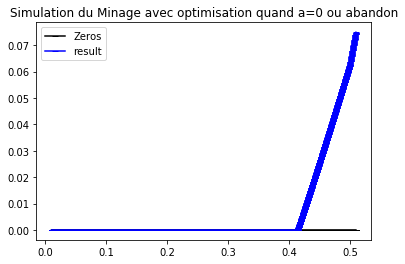

array([0.4142])

In [5]:
# Le minage 1+2 est une attaque qui dure au maximun 3 blocks
# On va le comparer avec le minage d'optimisation de minage sans Ajustement de Blocks en profondeur 3
nombre=3
L_proba,L_result = SimESA(nombre,0.01,0.51,0.0001)
plotESA(L_proba,L_result)
# le minage est rentable pour un même puissance de Hashage

### c) Seuil de rentabilité

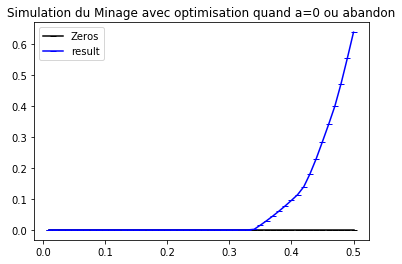

array([0.33])

In [6]:
nombre=12
L_proba,L_result = SimESA(nombre,0.01,0.51,0.01)
plotESA(L_proba,L_result)
# avec un nombre entre 10 et 20, la puissance minimale requise est entre 33 et 34%.

## 3) Cas quand la simulation s'arrête avec n=0 

In [26]:
def ENA(a,h,n,proba,cout):
    q=proba
    p=1-proba
    c=cout
    if n<=-1:
        return 0
    else:
        if(a>=h+1):
          # il écrase les blocks du réseau ou il continue à miner
            return max(h+1-c+ENA(a-h-1,0,n,q,c),p*(ENA(a,h+1,n-1,q,c)-c)+q*(ENA(a+1,h,n-1,q,c)))
        else:
          # il abandonne ou il continue à miner
            return max(ENA(0,0,n,q,c),p*(ENA(a,h+1,n-1,q,c)-c)+q*(ENA(a+1,h,n-1,q,c)))

In [27]:
def SimENA(nombre,start=0.01,end=0.51,gap=0.001):
  L_proba=np.arange(start,end,gap)
  L_result=[]
  for proba in L_proba:
    L_result.append(ENA(0,0,nombre,proba,proba))
  return L_proba,L_result

In [28]:
#graph de la simulation
def plotENA(L_proba,L_result):
  L_zero=np.array([0]*len(L_proba))
  fig,ax=plt.subplots()
  plt.title("Simulation du Minage avec optimisation quand n=0")
  ax.plot(L_proba,L_zero,marker="_",color='black')
  ax.plot(L_proba,L_result,marker="_",color='blue')
  ax.legend(["Zeros","result"])
  plt.show()
  idx = np.argwhere(np.diff(np.sign(L_zero - L_result))).flatten() #index intersection Exp
  return L_proba[idx]

In [29]:
nombre=3
L_proba,L_result = SimENA(nombre,0.01,0.51,0.0001)
plotENA(L_proba,L_result)

RecursionError: maximum recursion depth exceeded in comparison

In [25]:
import sys
print(sys.getrecursionlimit())
#ENA(0,0,3,0.4,0.4)

3000


## 4) Cas quand l'attaquant paye les blocks orphelins

In [15]:
# Il prend en compte les blocks Orphelins
def EAA(a,h,n,proba,cout):
    q=proba
    p=1-proba
    c=cout
    if n<=-1:
        return 0
    else:
        if(a>h+1):
          # il écrase les blocks du réseau ou il continue à miner
            return max(h+1-c*(h+1)+EAA(a-h-1,0,n,q,c),p*(EAA(a,h+1,n-1,q,c)-c)+q*(EAA(a+1,h,n-1,q,c)))
        elif(a==h+1):
          # il écrase les blocks du réseau ou il continue à miner
            return max(h+1-c*(h+1),p*(EAA(a,h+1,n-1,q,c)-c)+q*(EAA(a+1,h,n-1,q,c)))
        else:
          # il abandonne ou il continue à miner
            return max(0,p*(EAA(a,h+1,n-1,q,c)-c)+q*(EAA(a+1,h,n-1,q,c)))

In [16]:
def SimEAA(nombre,start=0.01,end=0.51,gap=0.001):
  L_proba=np.arange(start,end,gap)
  L_result=[]
  for proba in L_proba:
    L_result.append(EAA(0,0,nombre,proba,proba))
  return L_proba,L_result

In [17]:
#graph de la simulation
def plotEAA(L_proba,L_result):
  L_zero=np.array([0]*len(L_proba))
  fig,ax=plt.subplots()
  plt.title("Simulation du Minage avec prise en compte les blocks orphelins")
  ax.plot(L_proba,L_zero,marker="_",color='black')
  ax.plot(L_proba,L_result,marker="_",color='blue')
  ax.legend(["Zeros","result"])
  plt.show()
  idx = np.argwhere(np.diff(np.sign(L_zero - L_result))).flatten() #index intersection Exp
  return L_proba[idx]

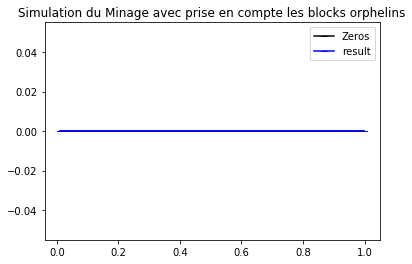

array([], dtype=float64)

In [18]:
nombre=3
L_proba,L_result = SimEAA(nombre,0.01,1,0.001)
plotEAA(L_proba,L_result)

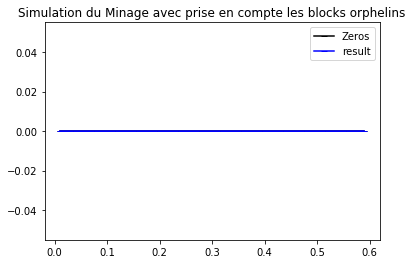

array([], dtype=float64)

In [19]:
nombre=10
L_proba,L_result = SimEAA(nombre,0.01,0.6,0.01)
plotEAA(L_proba,L_result)

<h1><center>Fin Du TD</center></h1>